In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import nltk.tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob

In [10]:
# Read dataset file preprocessed.csv
dataset = pd.read_csv("preprocessed.csv",header=0)

Text(0, 0.5, 'Count')

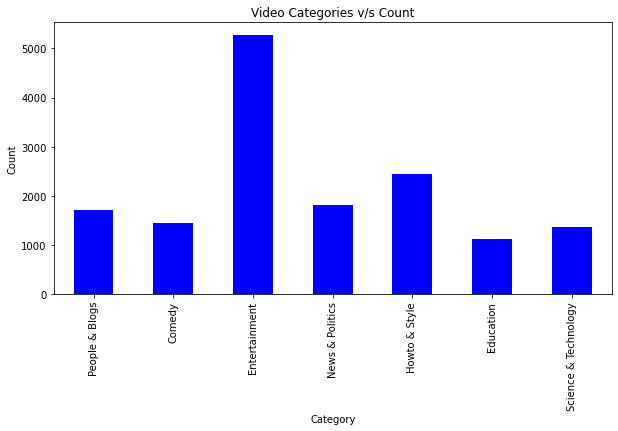

In [14]:
category_id_list = {2 : "Autos & Vehicles",
1 :  "Film & Animation",
10 : "Music",
15 : "Pets &, Animals",
17 : "Sports",
18 : "Short Movies",
19 : "Travel & Events",
20 : "Gaming",
21 : "Videoblogging",
22 : "People & Blogs",
23 : "Comedy",
24 : "Entertainment",
25 : "News & Politics",
26 : "Howto & Style",
27 : "Education",
28 : "Science & Technology",
29 : "Nonprofits & Activism",
30 : "Movies",
31 : "Anime/Animation",
32 : "Action/Adventure",
33 : "Classics",
34 : "Comedy",
35 : "Documentary",
36 : "Drama",
37 : "Family",
38 : "Foreign",
39 : "Horror",
40 : "Sci-Fi/Fantasy",
41 : "Thriller",
42 : "Shorts",
43 : "Shows",
44 : "Trailers"}

all_categories = dataset.groupby('category_id').count()['title']
all_categories = all_categories.rename(category_id_list)

ax = all_categories.plot(kind='bar',title='Video Categories v/s Count',color='blue',figsize=(10,5))
ax.set_xlabel('Category')
ax.set_ylabel('Count')

Text(0, 0.5, 'Likes')

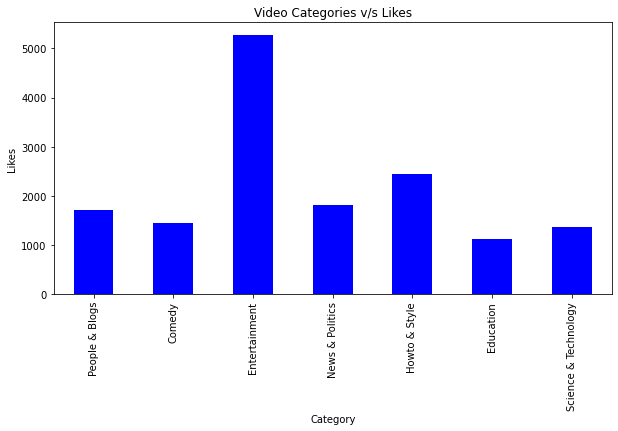

<AxesSubplot:xlabel='likes', ylabel='views'>

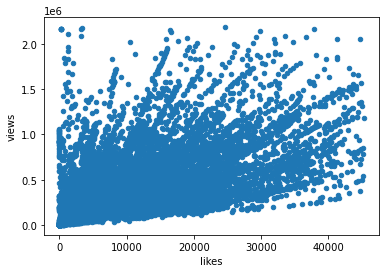

In [31]:
dataset.plot(x="likes", y="views", kind="scatter")

<AxesSubplot:xlabel='dislikes', ylabel='views'>

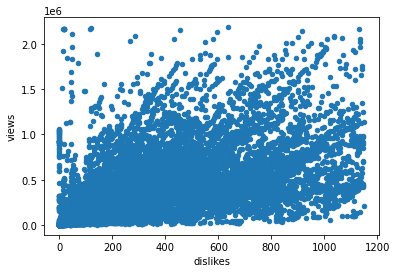

In [32]:
dataset.plot(x="dislikes",y="views", kind="scatter")

<AxesSubplot:xlabel='likes', ylabel='dislikes'>

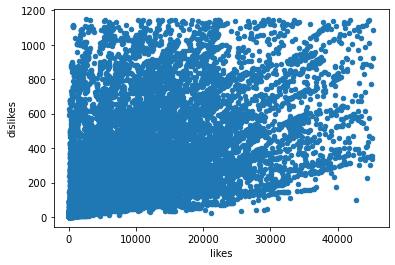

In [34]:
dataset.plot(x="likes",y="dislikes", kind="scatter")

[None, None, None, None, None, None, None, None, None, None]

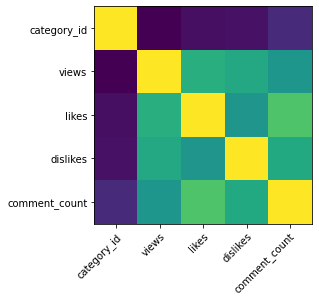

In [40]:
# get correlation matrix
updated_dataset = []
updated_dataset = dataset[["video_id", "trending_date","title","channel_title","category_id","publish_time","tags","views","likes","dislikes","comment_count"]]
corr = updated_dataset.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")

<AxesSubplot:>

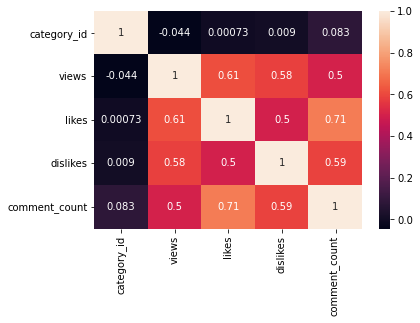

In [43]:
sns.heatmap(updated_dataset.corr(), annot=True)

In [46]:
text=dataset['tags']
#data['text']=text
#data=rem_stopwords_tokenize(data,'text')
#data=make_sentences(data,'text')

In [47]:
text

0        rhett and link|"gmm"|"good mythical morning"|"...
1        ijustine|"week with iPhone X"|"iphone x"|"appl...
2        The Walking Dead|"shiva"|"tiger"|"king ezekiel...
3        Robots|"Boston Dynamics"|"SpotMini"|"Legged Lo...
4        pacific rim|"pacific rim 2"|"pacific rim seque...
                               ...                        
15203    the daily show|"trevor noah"|"daily show with ...
15204    BuzzFeed|"As/Is"|"Prom Season"|"video"|"prom"|...
15205    Late Night|"Seth Meyers"|"Ellie Kemper"|"Mindy...
15206    The Tonight Show|"Jimmy Fallon"|"Mindy Kaling"...
15207    SciShow|"science"|"Hank"|"Green"|"education"|"...
Name: tags, Length: 15208, dtype: object